https://www.kaggle.com/code/renjithmadhavan/credit-card-fraud-detection-using-python/notebook

# Loading the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv('creditcard.csv', index_col = False)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df_copy = df.copy()

In [4]:
df.shape

(284807, 31)

In [5]:
df['Class'].unique()

array([0, 1], dtype=int64)

# Standardize the amount

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
amt_scaler = StandardScaler()
amt_scaler.fit(np.array(df['Amount']).reshape(-1, 1))

StandardScaler()

In [8]:
df['Amount'] = amt_scaler.transform(np.array(df['Amount']).reshape(-1, 1))

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


# Balance the dataset

In [10]:
class0, class1 = df['Class'].value_counts()
class0, class1

(284315, 492)

In [11]:
c1 = df[df['Class'] == 1]
c1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.353229,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.761758,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.606031,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.117342,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.349231,1


In [12]:
df1 = c1.sample(class0 - class1, replace=True)
df1.shape

(283823, 31)

In [13]:
balanced_df = df.copy()
balanced_df = pd.concat([balanced_df, df1])
balanced_df['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [14]:
num_rows = round(balanced_df['Class'].value_counts()[0], -2)
balanced_df = balanced_df.sample(num_rows)
c = balanced_df['Class'].value_counts()
print(f"No. of rows: {balanced_df.shape[0]} \t " + \
      f"Class 0: {round(c[0] / (c[0] + c[1]), 3)} \t " + \
      f"Class 1: {round(c[1] / (c[0] + c[1]), 3)}")

No. of rows: 284300 	 Class 0: 0.501 	 Class 1: 0.499


In [15]:
balanced_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
78885,57753.0,-0.447355,0.601949,1.825277,0.983393,0.452469,-0.124043,0.511383,0.007641,-0.719251,...,0.115434,0.406615,-0.274360,0.210017,0.360789,-0.169303,-0.153379,-0.243288,-0.333239,0
14211,25254.0,-17.275191,10.819665,-20.363886,6.046612,-13.465033,-4.166647,-14.409448,11.580797,-4.073856,...,1.729804,-1.208096,-0.726839,0.112540,1.119193,-0.233189,1.684063,0.503740,0.046539,1
226814,144808.0,-2.405207,2.943823,-7.616654,3.533374,-5.417494,-0.112632,-1.329372,1.709417,-2.322716,...,0.652683,0.414132,0.023869,-0.260616,0.405316,0.029107,0.519807,-0.469537,2.315693,1
151196,94952.0,0.842025,-0.365518,-2.464063,4.820886,0.775505,-0.614785,1.368024,-0.526262,-0.121356,...,-0.110622,-1.257800,-0.324418,-0.420020,-0.219501,-0.268873,-0.144582,0.104464,1.931597,1
124036,77154.0,-0.715414,0.608590,1.155501,-0.267565,-0.563748,-0.618898,0.698308,0.069837,-0.133341,...,0.130749,0.239389,-0.090227,0.411572,-0.216126,0.353896,-0.062361,0.008433,0.162524,1


In [16]:
balanced_df = balanced_df.iloc[:, 1:]
balanced_df = balanced_df.reset_index(drop=True)
balanced_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.447355,0.601949,1.825277,0.983393,0.452469,-0.124043,0.511383,0.007641,-0.719251,0.167134,...,0.115434,0.406615,-0.274360,0.210017,0.360789,-0.169303,-0.153379,-0.243288,-0.333239,0
1,-17.275191,10.819665,-20.363886,6.046612,-13.465033,-4.166647,-14.409448,11.580797,-4.073856,-9.153368,...,1.729804,-1.208096,-0.726839,0.112540,1.119193,-0.233189,1.684063,0.503740,0.046539,1
2,-2.405207,2.943823,-7.616654,3.533374,-5.417494,-0.112632,-1.329372,1.709417,-2.322716,-6.540989,...,0.652683,0.414132,0.023869,-0.260616,0.405316,0.029107,0.519807,-0.469537,2.315693,1
3,0.842025,-0.365518,-2.464063,4.820886,0.775505,-0.614785,1.368024,-0.526262,-0.121356,-0.357616,...,-0.110622,-1.257800,-0.324418,-0.420020,-0.219501,-0.268873,-0.144582,0.104464,1.931597,1
4,-0.715414,0.608590,1.155501,-0.267565,-0.563748,-0.618898,0.698308,0.069837,-0.133341,-1.025335,...,0.130749,0.239389,-0.090227,0.411572,-0.216126,0.353896,-0.062361,0.008433,0.162524,1


# Separate into Train, Test, Validate

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
inputs, targets = balanced_df.iloc[:, :-1], balanced_df.iloc[:, -1]
train_inputs, test_inputs, train_targets, test_targets = train_test_split(inputs, targets, train_size=0.8, random_state=5)

In [19]:
print(train_inputs.shape[0], test_inputs.shape[0])
print(train_targets.shape[0], test_targets.shape[0])

227440 56860
227440 56860


# Model

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression()
model.fit(train_inputs, train_targets)

LogisticRegression()

# Model Performance

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
model.score(train_inputs, train_targets)

0.9508881463243053

In [24]:
predictions = model.predict(train_inputs)
predictions

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

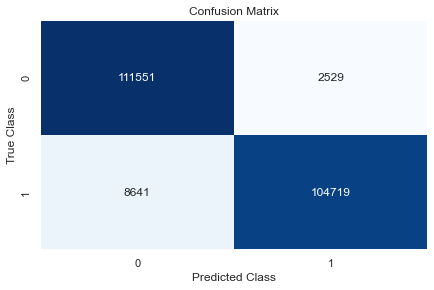

In [25]:
heatmap_df = pd.DataFrame(confusion_matrix(train_targets, predictions))
sns.heatmap(heatmap_df, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [26]:
model_summary = pd.DataFrame()
model_summary['Features'] = ['Intercept'] + [*inputs.columns.values]
model_summary['Weights']  = [model.intercept_[0]] + [*model.coef_[0]]

model_summary = model_summary.sort_values('Weights')
model_summary = model_summary.reset_index(drop = True)

model_summary

,Features,Weights
0,Intercept,-3.501576
1,V14,-1.395313
2,V12,-1.097943
3,V20,-0.866316
4,V17,-0.841613
5,V16,-0.760997
6,V10,-0.744414
7,V7,-0.622791
8,V6,-0.589839
9,V8,-0.417092


# Test model

In [27]:
round(model.score(test_inputs, test_targets), 3)

0.948

# Save model

In [28]:
import pickle

In [29]:
with open('model', 'wb') as file:
    pickle.dump(model, file)